In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

In [5]:
# 1. Récupérer le dataset "Forest Fires"
forest_fires = fetch_ucirepo(id=162)

In [6]:
# 2. Extraire les données et la cible
X = forest_fires.data.features  # Les caractéristiques (features)
y = forest_fires.data.targets   # La cible (target)

In [7]:
# 3. Informations sur les métadonnées et les variables
print("Métadonnées du dataset :")
print(forest_fires.metadata)

print("\nInformations sur les variables (features et target) :")
print(forest_fires.variables)

Métadonnées du dataset :
{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fire

In [8]:
# 4. Aperçu des premières lignes des caractéristiques et de la cible
print("\nPremières lignes des caractéristiques (X) :")
print(X.head())

print("\nPremières lignes de la cible (y) :")
print(y.head())


Premières lignes des caractéristiques (X) :
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0

Premières lignes de la cible (y) :
   area
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0


In [9]:
# 5. Informations générales sur les données
print("\nInformations sur les caractéristiques (X) :")
print(X.info())
print("\nStatistiques descriptives des caractéristiques numériques de X :")
print(X.describe())


Informations sur les caractéristiques (X) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 48.6+ KB
None

Statistiques descriptives des caractéristiques numériques de X :
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.6

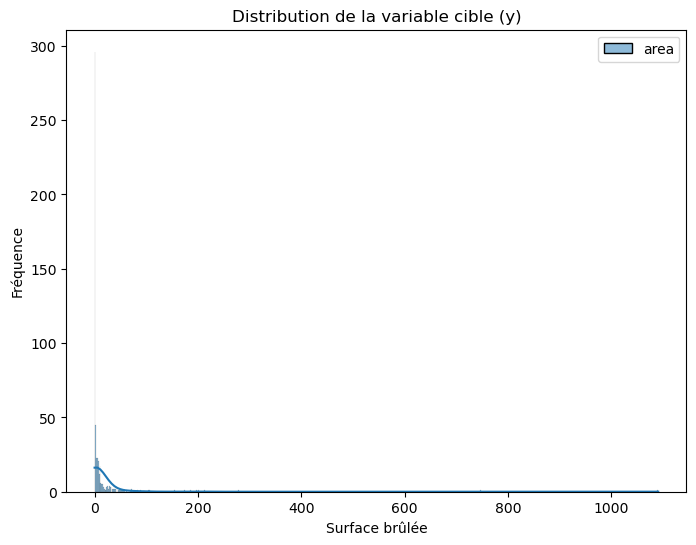

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution de la variable cible (y)
plt.figure(figsize=(8,6))
sns.histplot(y, kde=True, color='blue')
plt.title('Distribution de la variable cible (y)')
plt.xlabel('Surface brûlée')
plt.ylabel('Fréquence')
plt.show()

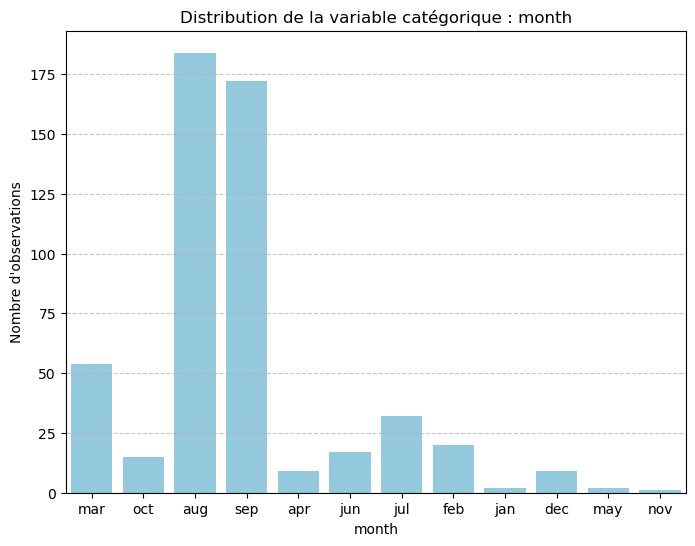

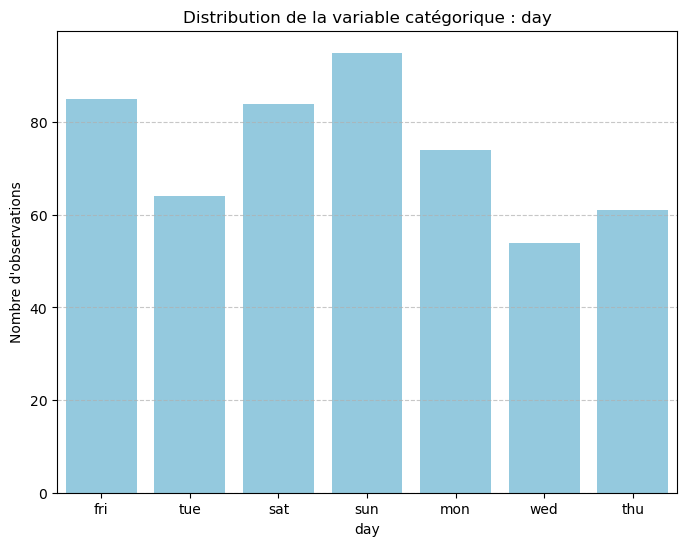

In [11]:
# 2. Analyse des variables catégoriques (si existantes)
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=X, x=col, color='skyblue')  # Utilisation de 'color' au lieu de 'palette'
    plt.title(f'Distribution de la variable catégorique : {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre d\'observations')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [12]:
# 3. Vérification des valeurs manquantes
print("\nValeurs manquantes dans X :")
print(X.isnull().sum())


Valeurs manquantes dans X :
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
dtype: int64


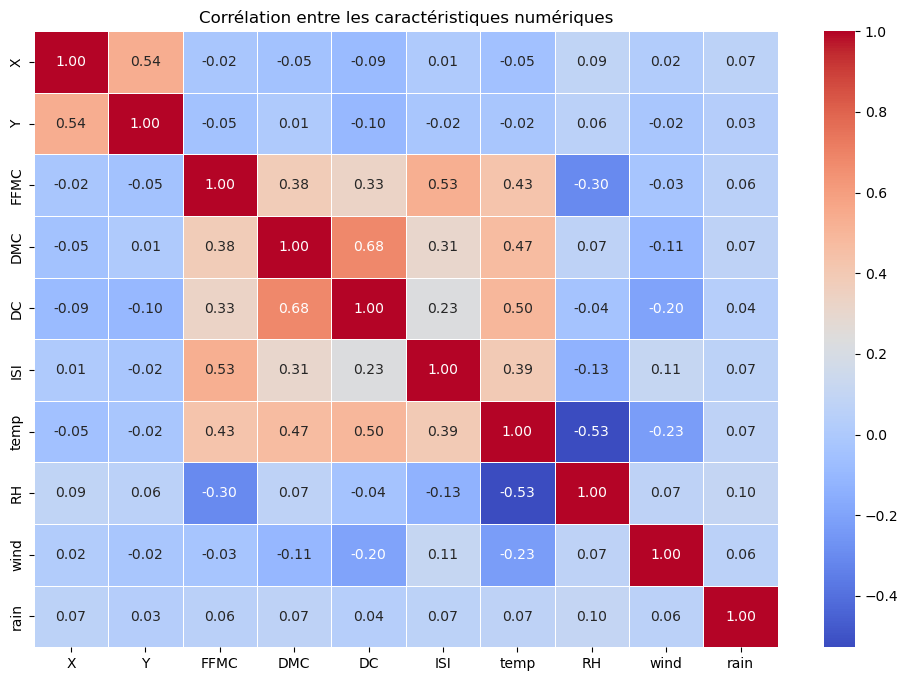

In [13]:
# 4. Vérification de la corrélation entre les caractéristiques
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques uniquement
numeric_X = X.select_dtypes(include=['int64', 'float64'])

# Calcul et visualisation de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Corrélation entre les caractéristiques numériques')
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
# 1. Identification des variables numériques et catégoriques
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [16]:
# 2. Création des pipelines de prétraitement
# Pipeline pour les variables numériques : Imputation (moyenne) et Standardisation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputation des valeurs manquantes
    ('scaler', StandardScaler())  # Standardisation des données numériques
])

In [17]:
# Pipeline pour les variables catégoriques : Imputation (valeur la plus fréquente) et OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputation des valeurs manquantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoding des variables catégoriques
])


In [18]:
# 3. Préparation du préprocesseur global (pour toutes les colonnes)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:
# 4. Transformation des données avec le préprocesseur
X_transformed = preprocessor.fit_transform(X)

In [20]:
# 5. Encodage de la variable cible (y) si nécessaire (par exemple, pour une variable binaire)
from sklearn.preprocessing import LabelEncoder

# 5. Encodage de la variable cible (y)
encoder = LabelEncoder()

# Convertir y en une structure unidimensionnelle si nécessaire
y_encoded = encoder.fit_transform(y.values.ravel())  # Utilise .ravel() pour aplatir en 1D


In [21]:
# 6. Séparation des données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_encoded, test_size=0.2, random_state=42)

In [22]:
# Affichage des formes des ensembles d'entraînement et de test
print(f"Forme des données d'entraînement : {X_train.shape}")
print(f"Forme des données de test : {X_test.shape}")

Forme des données d'entraînement : (413, 29)
Forme des données de test : (104, 29)


In [23]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 1. Application de l'ACP (Réduction à 2 composantes principales)
pca = PCA(n_components=2)  # Choisir 2 composantes principales
X_pca = pca.fit_transform(X_transformed)

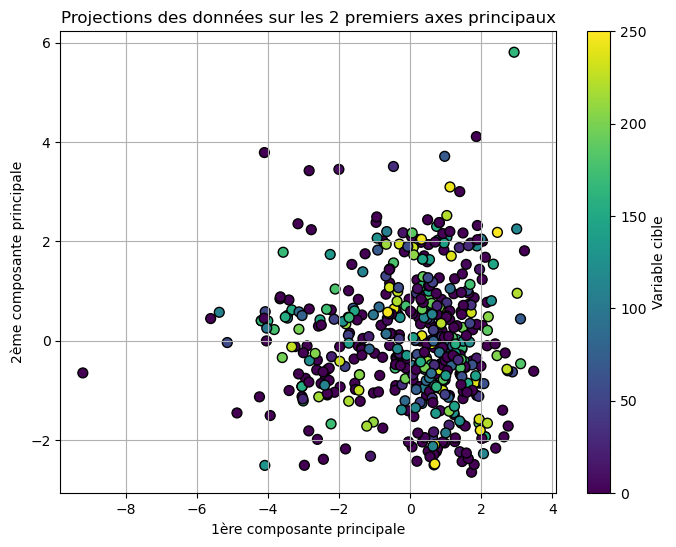

In [24]:
# 2. Visualisation des projections des données sur les 2 premiers axes principaux
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', s=50)
plt.title('Projections des données sur les 2 premiers axes principaux')
plt.xlabel('1ère composante principale')
plt.ylabel('2ème composante principale')
plt.colorbar(label='Variable cible')  # Ajouter une légende pour la variable cible
plt.grid(True)
plt.show()

In [25]:
# 3. Variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

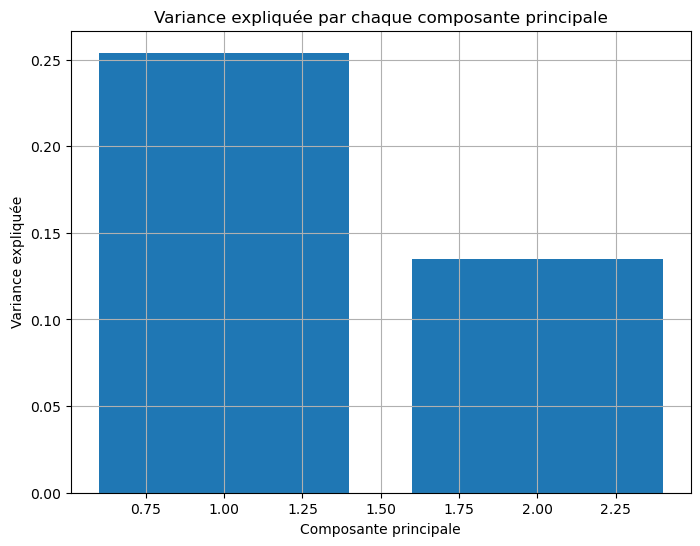

In [26]:
# 4. Visualisation de la variance expliquée par chaque composante principale
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Variance expliquée par chaque composante principale')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.grid(True)
plt.show()

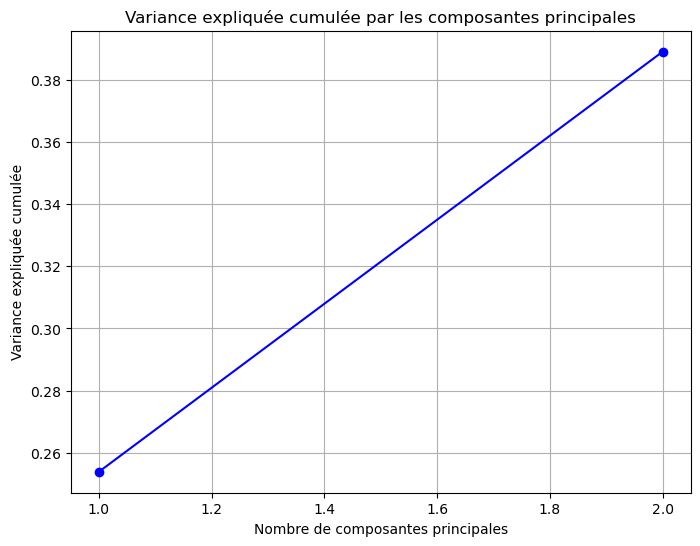

In [27]:
# 5. Graphique de la variance expliquée cumulée
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', color='b')
plt.title('Variance expliquée cumulée par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)
plt.show()

In [28]:
# 6 : Visualisation des projections en 3D 
pca_3d = PCA(n_components=3)  # Réduction à 3 composantes principales
X_pca_3d = pca_3d.fit_transform(X_transformed)


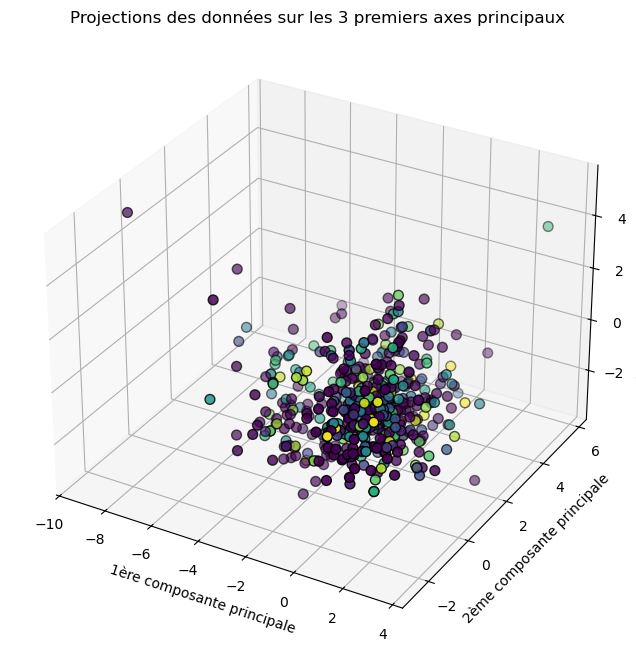

In [29]:
# Visualisation en 3D des données projetées sur les 3 premiers axes principaux
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_encoded, cmap='viridis', edgecolor='k', s=50)
ax.set_title('Projections des données sur les 3 premiers axes principaux')
ax.set_xlabel('1ère composante principale')
ax.set_ylabel('2ème composante principale')
ax.set_zlabel('3ème composante principale')

plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

# Standardisation des données numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)


In [31]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# 1. Générer des étiquettes pour les observations
observation_labels = [f"Obs {i+1}" for i in range(X_scaled.shape[0])]

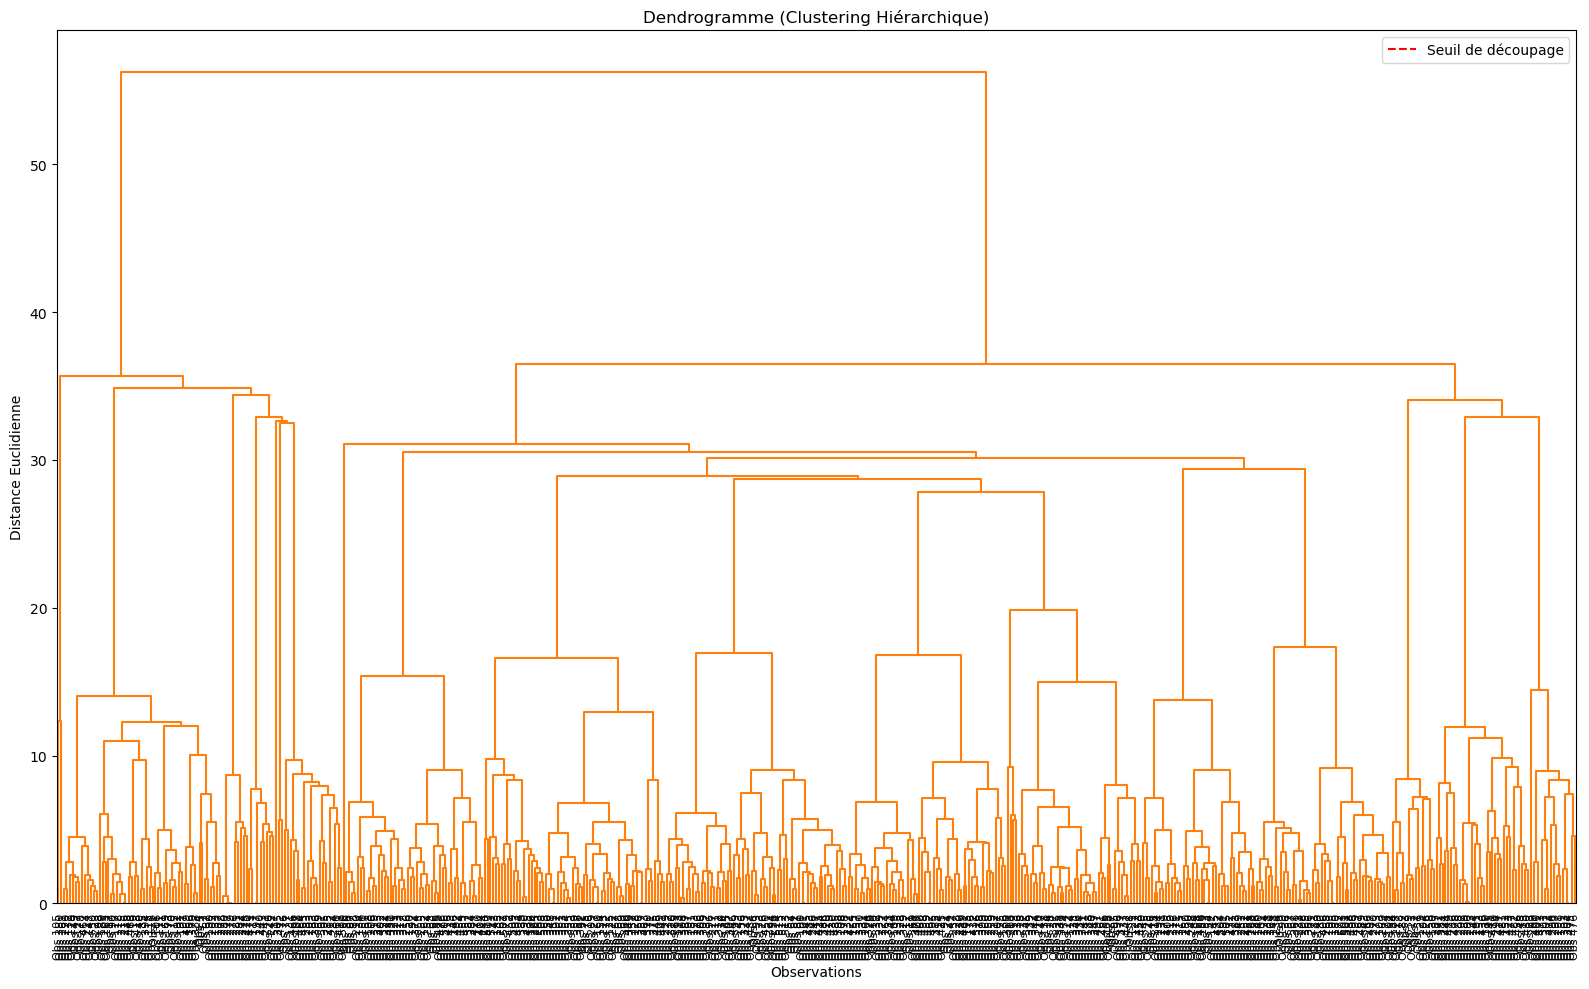

In [32]:
# 2. Calcul des distances et création du dendrogramme
plt.figure(figsize=(16, 10))
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method='ward'),
    labels=observation_labels,  # Ajout des étiquettes des observations
    leaf_rotation=90,  # Rotation des étiquettes des observations
    leaf_font_size=8,  # Taille des étiquettes des observations
    color_threshold=100,  # Seuil de couleur pour les clusters
    above_threshold_color='gray'  # Couleur des liens au-dessus du seuil
)
plt.axhline(y=100, color='r', linestyle='--', label='Seuil de découpage')  # Ligne horizontale pour seuil
plt.title('Dendrogramme (Clustering Hiérarchique)')
plt.xlabel('Observations')
plt.ylabel('Distance Euclidienne')
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering

# 3. Découpage en clusters
n_clusters = 3  # Ajuster en fonction du dendrogramme
cha = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
y_cha = cha.fit_predict(X_scaled)


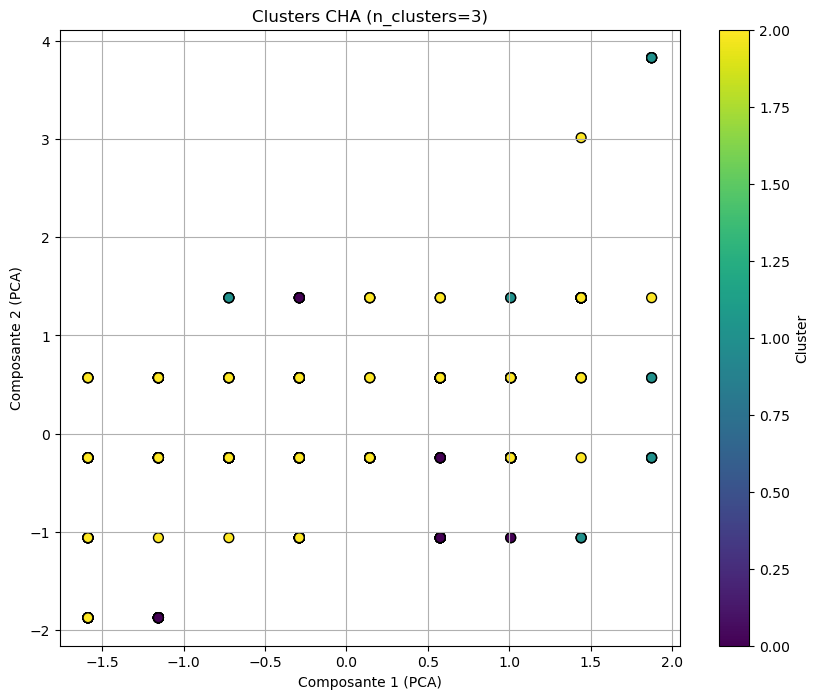

In [34]:
# 4. Visualisation des clusters sur les deux premières dimensions PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_cha, cmap='viridis', edgecolor='k', s=50)
plt.title(f'Clusters CHA (n_clusters={n_clusters})')
plt.xlabel('Composante 1 (PCA)')
plt.ylabel('Composante 2 (PCA)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [35]:
from sklearn.cluster import KMeans
import numpy as np

# Détermination du nombre optimal de clusters (Elbow Method)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

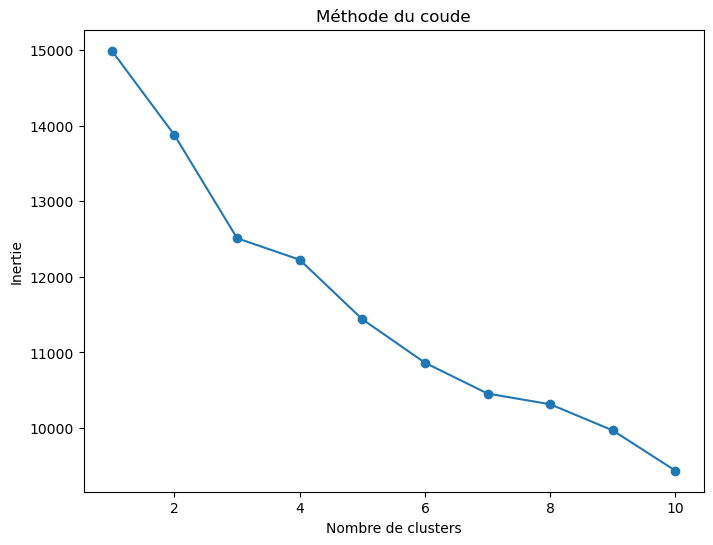

In [36]:
# Visualisation du "Elbow Method"
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [37]:
# Application de K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajuster n_clusters
y_kmeans = kmeans.fit_predict(X_scaled)

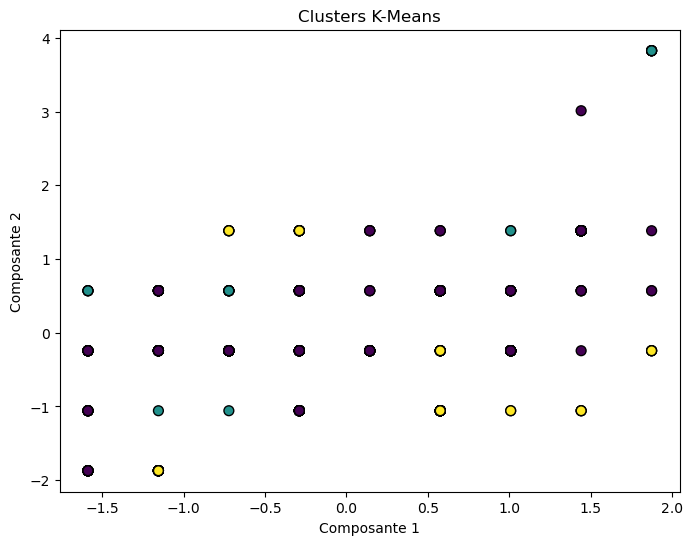

In [38]:
# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters K-Means')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.show()

In [39]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle



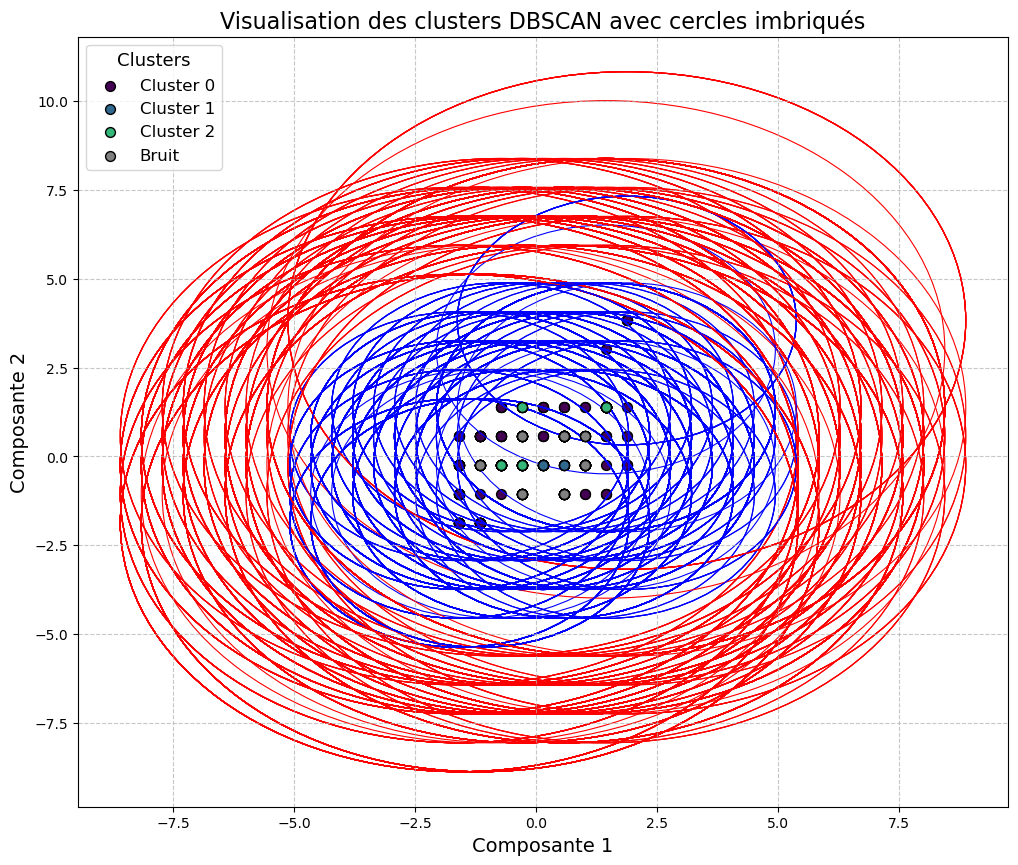

In [40]:

# Application de DBSCAN
dbscan = DBSCAN(eps=7, min_samples=5)  # Ajuster eps et min_samples
y_dbscan = dbscan.fit_predict(X_scaled)

# Création de la figure
plt.figure(figsize=(12, 10))
plt.title('Visualisation des clusters DBSCAN avec cercles imbriqués', fontsize=16)

# Tracé des points et des clusters
unique_labels = set(y_dbscan)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Tracer les points et les cercles pour chaque label
for k, color in zip(unique_labels, colors):
    if k == -1:
        # Bruit
        color = 'gray'
        label = "Bruit"
    else:
        label = f"Cluster {k}"
    
    mask = (y_dbscan == k)
    
    # Tracer les points du cluster
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], c=[color], edgecolor='k', s=50, label=label)
       # Cercle extérieur (avec rayon `eps`)
    for point in X_scaled[mask]:
        outer_circle = Circle((point[0], point[1]), radius=dbscan.eps, color='r', fill=False, linestyle='-', linewidth=0.8)
        # Cercle intérieur (plus petit, à l'intérieur du cercle extérieur)
        inner_circle = Circle((point[0], point[1]), radius=dbscan.eps / 2, color='b', fill=False, linestyle='-', linewidth=0.8)
        
        plt.gca().add_patch(outer_circle)
        plt.gca().add_patch(inner_circle)

# Améliorations sur les labels, la légende et l'affichage
plt.xlabel('Composante 1', fontsize=14)
plt.ylabel('Composante 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajout de la légende et affichage de la figure
plt.legend(loc='best', fontsize=12, title='Clusters', title_fontsize='13')
plt.show()



In [41]:
from sklearn.cluster import MeanShift
import numpy as np

# Application de Mean Shift
mean_shift = MeanShift()
y_meanshift = mean_shift.fit_predict(X_scaled)

In [42]:
# Extraction des centres de clusters
cluster_centers = mean_shift.cluster_centers_

In [43]:
# Nombre de clusters détectés
n_clusters_meanshift = len(np.unique(y_meanshift))
print(f"Nombre de clusters détectés par Mean Shift : {n_clusters_meanshift}")

Nombre de clusters détectés par Mean Shift : 12


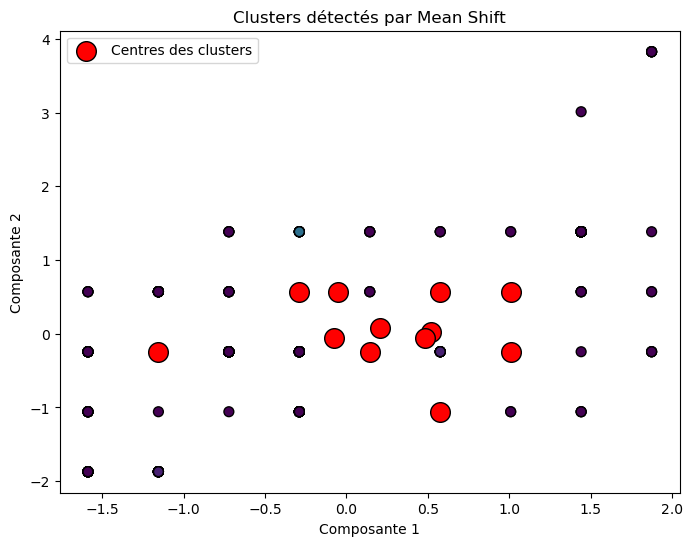

In [44]:
# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_meanshift, cmap='viridis', edgecolor='k', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', label='Centres des clusters', edgecolor='k')
plt.title('Clusters détectés par Mean Shift')
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

# Fonction pour calculer et afficher l'indice de silhouette
def compute_silhouette_score(X, labels, method_name):
    # Vérification : au moins 2 clusters pour calculer le score
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
        print(f"Silhouette Score ({method_name}): {score:.2f}")
    else:
        print(f"{method_name}: Silhouette Score non calculable (un seul cluster).")

In [46]:
# Calcul des indices de silhouette pour chaque méthode
compute_silhouette_score(X_scaled, y_cha, "CHA")
compute_silhouette_score(X_scaled, y_kmeans, "K-Means")
compute_silhouette_score(X_scaled, y_dbscan, "DBSCAN")
compute_silhouette_score(X_scaled, y_meanshift, "Mean Shift")

Silhouette Score (CHA): 0.19
Silhouette Score (K-Means): 0.10
Silhouette Score (DBSCAN): 0.36
Silhouette Score (Mean Shift): 0.28


In [47]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Vérification du nombre de clusters (y compris le bruit)
num_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)

In [48]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
# 1. Calcul de l'indice de Silhouette pour DBSCAN
if num_clusters > 1:  # Assurez-vous qu'il y a plus d'un cluster
    silhouette_dbscan = silhouette_score(X_scaled, y_dbscan)
    print(f"Silhouette Score DBSCAN: {silhouette_dbscan:.2f}")
else:
    print(f"DBSCAN: Aucun cluster valide, seulement du bruit ou un seul cluster.")

Silhouette Score DBSCAN: 0.36


In [49]:
# 2. K-Means - Tester différents nombres de clusters
from sklearn.cluster import KMeans

silhouette_scores_kmeans = []
range_n_clusters = range(2, 11)  # Tester pour n_clusters de 2 à 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_kmeans = kmeans.fit_predict(X_scaled)
    silhouette_scores_kmeans.append(silhouette_score(X_scaled, y_kmeans))

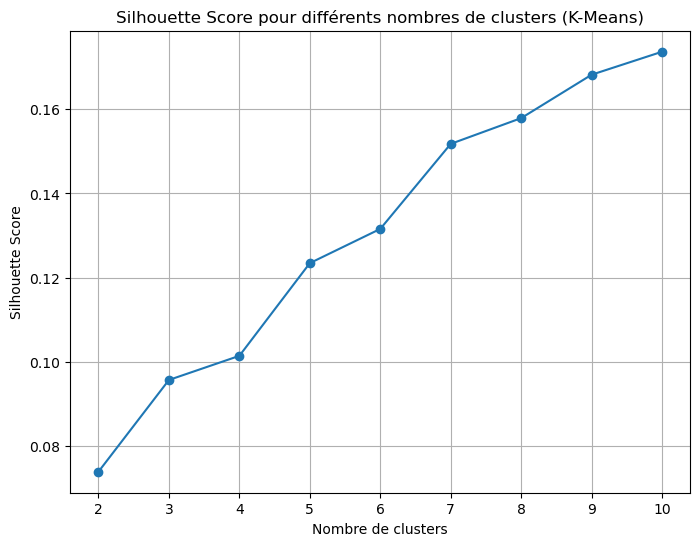

In [50]:
# Tracer l'évolution de l'indice de silhouette pour K-Means
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores_kmeans, marker='o')
plt.title('Silhouette Score pour différents nombres de clusters (K-Means)')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [51]:

# 3. Trouver le nombre optimal de clusters pour K-Means basé sur l'indice de Silhouette
optimal_kmeans_clusters = range_n_clusters[np.argmax(silhouette_scores_kmeans)]
print(f"Le nombre optimal de clusters pour K-Means est {optimal_kmeans_clusters}.")

Le nombre optimal de clusters pour K-Means est 10.


In [52]:

# 4. Pour DBSCAN - Tester plusieurs valeurs de `eps` et `min_samples`
eps_range = [0.1, 0.5, 1.0, 1.5]  # Tester différentes valeurs de `eps`
min_samples_range = [3, 5, 10]  # Tester différentes valeurs de `min_samples`

best_dbscan_score = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_dbscan_temp = dbscan.fit_predict(X_scaled)
        
        # Si plus d'un cluster est détecté, calculer l'indice de silhouette
        if len(set(y_dbscan_temp)) > 1:
            silhouette_temp = silhouette_score(X_scaled, y_dbscan_temp)
            if silhouette_temp > best_dbscan_score:
                best_dbscan_score = silhouette_temp
                best_eps = eps
                best_min_samples = min_samples

print(f"Meilleur score de silhouette pour DBSCAN : {best_dbscan_score:.2f}")
print(f"Meilleurs paramètres pour DBSCAN : eps = {best_eps}, min_samples = {best_min_samples}")

Meilleur score de silhouette pour DBSCAN : 0.34
Meilleurs paramètres pour DBSCAN : eps = 0.5, min_samples = 3


In [53]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

# Si X contient des colonnes non numériques, les encoder avant le scaling
# Encodage des colonnes catégorielles si nécessaire
label_encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X.loc[:, col] = label_encoder.fit_transform(X[col])  # Utiliser .loc pour éviter le SettingWithCopyWarning

# Si X_scaled n'est pas encore défini
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [54]:
# Application de K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [55]:
# Application de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

In [56]:
# Application de CHA (AgglomerativeClustering)
cha = AgglomerativeClustering(n_clusters=3)
y_cha = cha.fit_predict(X_scaled)

In [57]:
# Visualisation des résultats de clustering en 2D après réduction de dimension avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

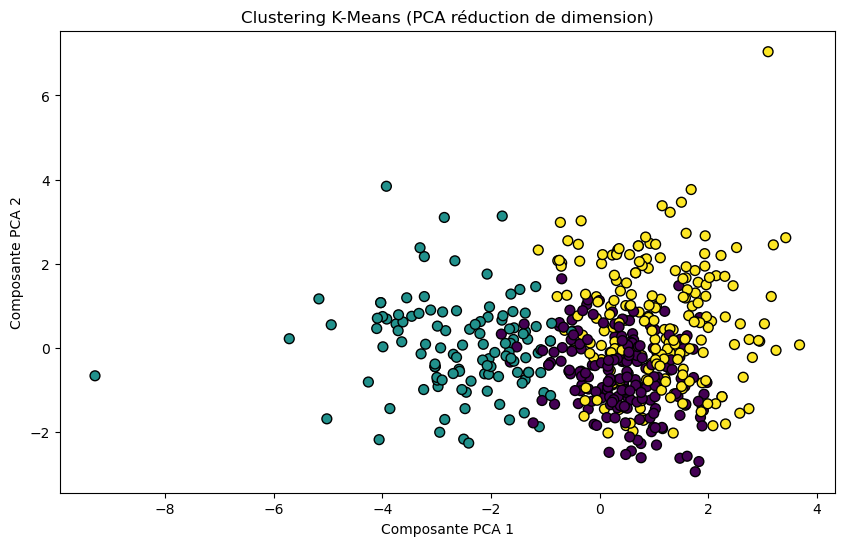

In [58]:
# Visualisation des résultats pour K-Means
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.title('Clustering K-Means (PCA réduction de dimension)')
plt.xlabel('Composante PCA 1')
plt.ylabel('Composante PCA 2')
plt.show()

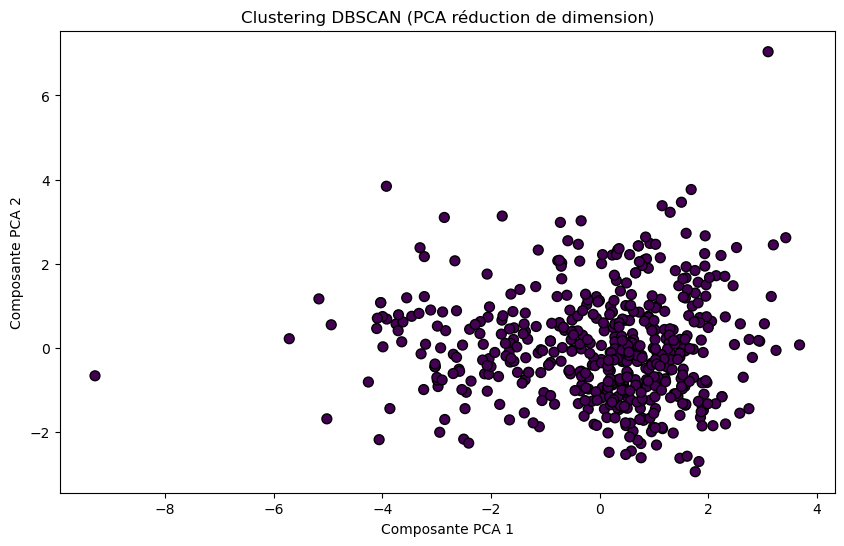

In [59]:
# Visualisation des résultats pour DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='viridis', edgecolor='k', s=50)
plt.title('Clustering DBSCAN (PCA réduction de dimension)')
plt.xlabel('Composante PCA 1')
plt.ylabel('Composante PCA 2')
plt.show()

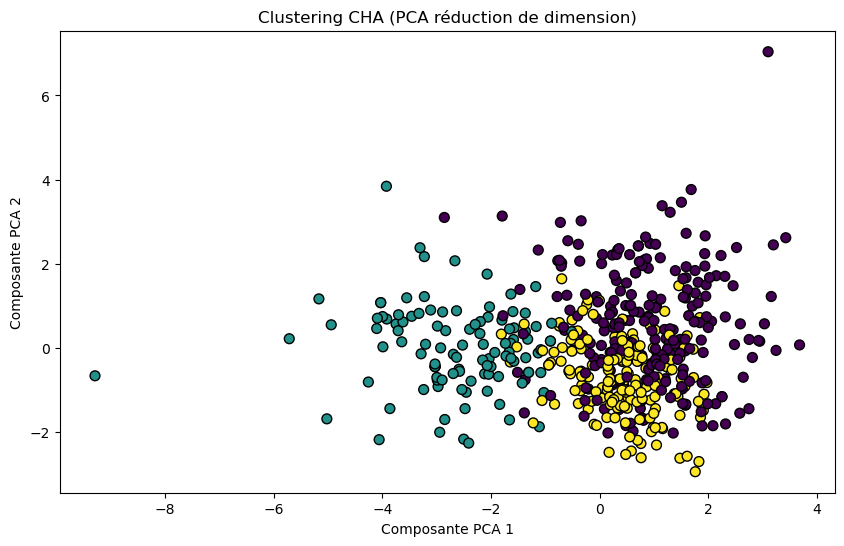

In [60]:
# Visualisation des résultats pour CHA (AgglomerativeClustering)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_cha, cmap='viridis', edgecolor='k', s=50)
plt.title('Clustering CHA (PCA réduction de dimension)')
plt.xlabel('Composante PCA 1')
plt.ylabel('Composante PCA 2')
plt.show()

In [61]:
# Réduction de la dimensionnalité à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

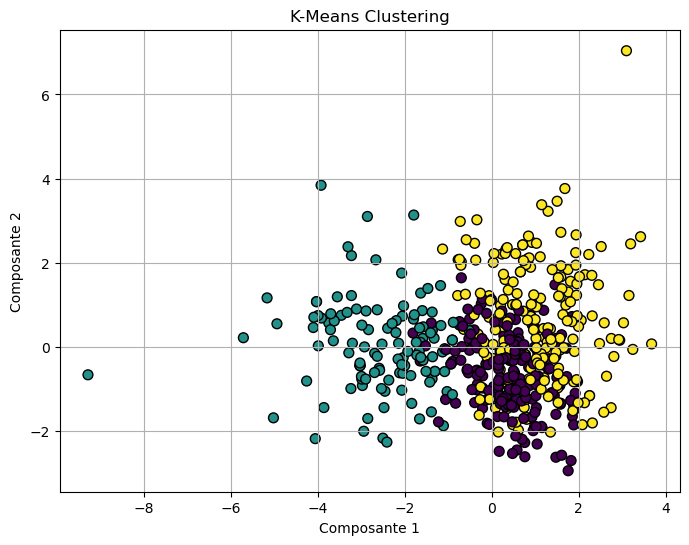

In [62]:
# Visualisation des résultats pour K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()

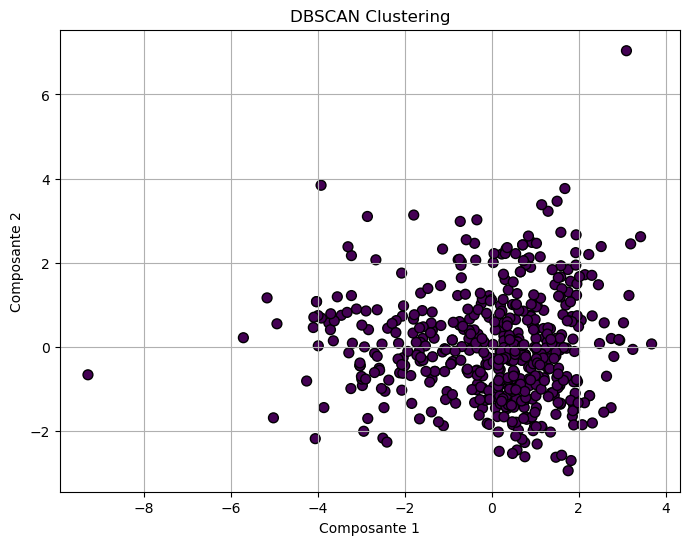

In [63]:
# Visualisation des résultats pour DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_dbscan, cmap='viridis', edgecolor='k', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()

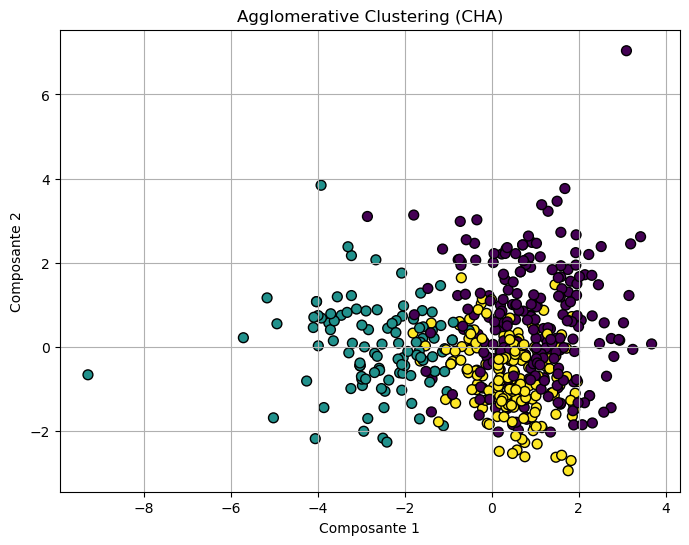

In [64]:
# Visualisation des résultats pour Agglomerative Clustering (CHA)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_cha, cmap='viridis', edgecolor='k', s=50)
plt.title("Agglomerative Clustering (CHA)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Composante 2')

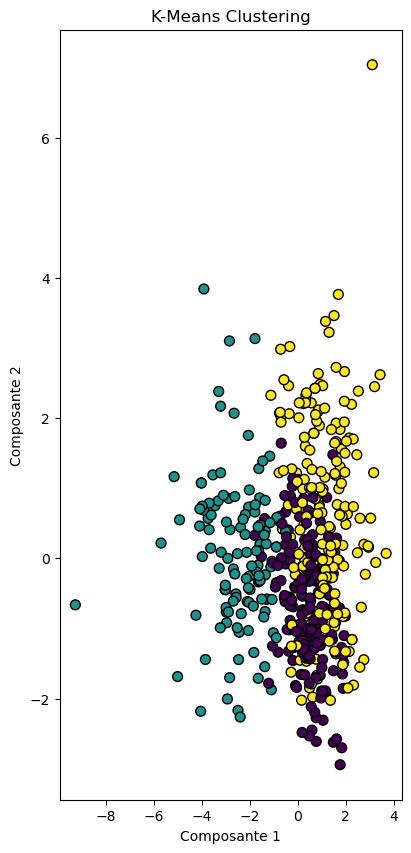

In [65]:
# Visualisation comparée des trois modèles sur les axes de projections (PCA)
plt.figure(figsize=(15, 10))

# K-Means
plt.subplot(1, 3, 1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")

Text(0, 0.5, 'Composante 2')

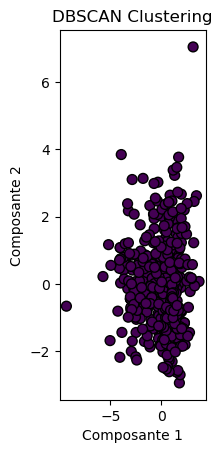

In [66]:
# DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_dbscan, cmap='viridis', edgecolor='k', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")

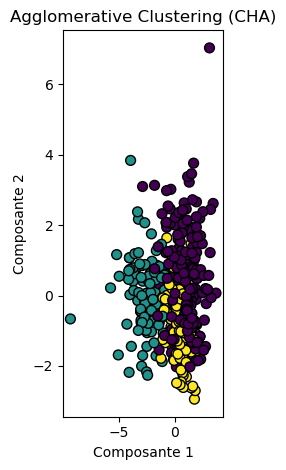

In [67]:
# CHA
plt.subplot(1, 3, 3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_cha, cmap='viridis', edgecolor='k', s=50)
plt.title("Agglomerative Clustering (CHA)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")

plt.tight_layout()
plt.show()

In [68]:
from sklearn.decomposition import PCA

# Application de PCA pour réduire la dimensionnalité à 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

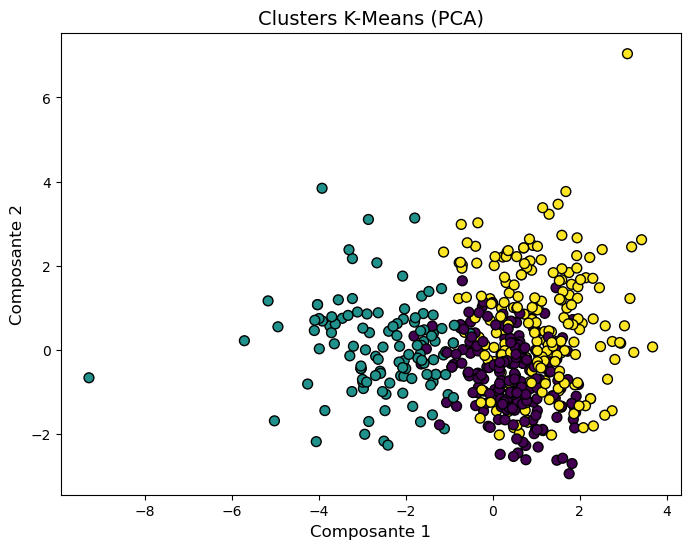

In [69]:
# Tracer les clusters avec PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters K-Means (PCA)', fontsize=14)
plt.xlabel('Composante 1', fontsize=12)
plt.ylabel('Composante 2', fontsize=12)
plt.show()

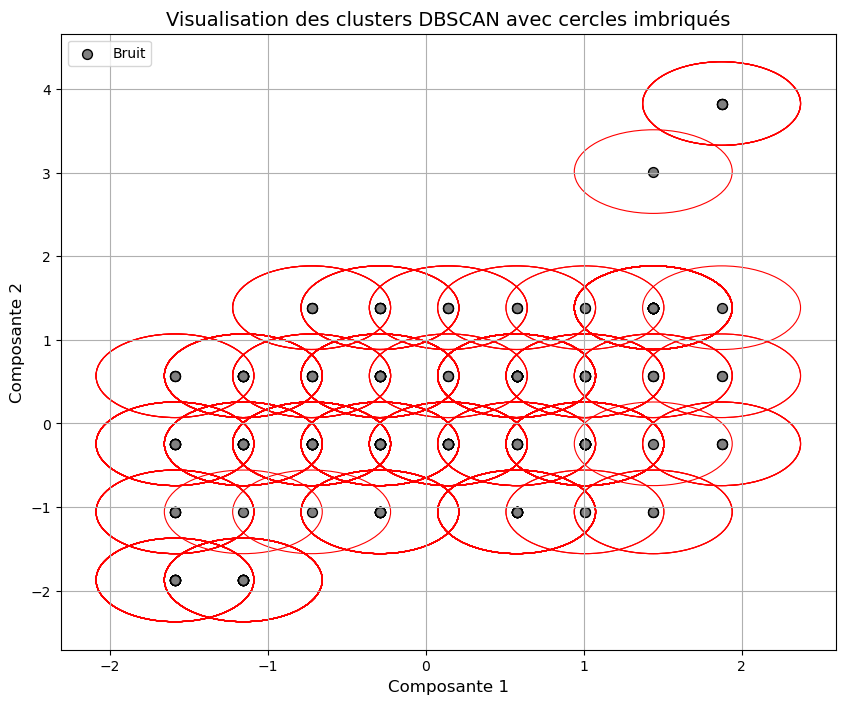

In [70]:
from matplotlib.patches import Circle

# Création de la figure
plt.figure(figsize=(10, 8))
plt.title('Visualisation des clusters DBSCAN avec cercles imbriqués', fontsize=14)
# Tracer les points et les clusters
unique_labels = set(y_dbscan)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Tracer les cercles pour chaque cluster
for k, color in zip(unique_labels, colors):
    if k == -1:
        color = 'gray'  # Bruit
    mask = (y_dbscan == k)
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], c=[color], edgecolor='k', s=50, label=f"Cluster {k}" if k != -1 else "Bruit")
    
    # Cercle extérieur (rayon `eps`)
    for point in X_scaled[mask]:
        outer_circle = Circle((point[0], point[1]), radius=dbscan.eps, color='r', fill=False, linestyle='-', linewidth=0.8)
        plt.gca().add_patch(outer_circle)

plt.xlabel('Composante 1', fontsize=12)
plt.ylabel('Composante 2', fontsize=12)
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [71]:
from sklearn.metrics import silhouette_score

# Calcul de l'indice de Silhouette pour K-Means, DBSCAN et Agglomerative Clustering
silhouette_kmeans = silhouette_score(X_scaled, y_kmeans)
silhouette_dbscan = silhouette_score(X_scaled, y_dbscan) if len(set(y_dbscan)) > 1 else 'Non calculable'
silhouette_cha = silhouette_score(X_scaled, y_cha)

print(f"Silhouette Score (K-Means): {silhouette_kmeans:.2f}")
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_cha:.2f}")

Silhouette Score (K-Means): 0.17
Silhouette Score (DBSCAN): Non calculable
Silhouette Score (Agglomerative Clustering): 0.16


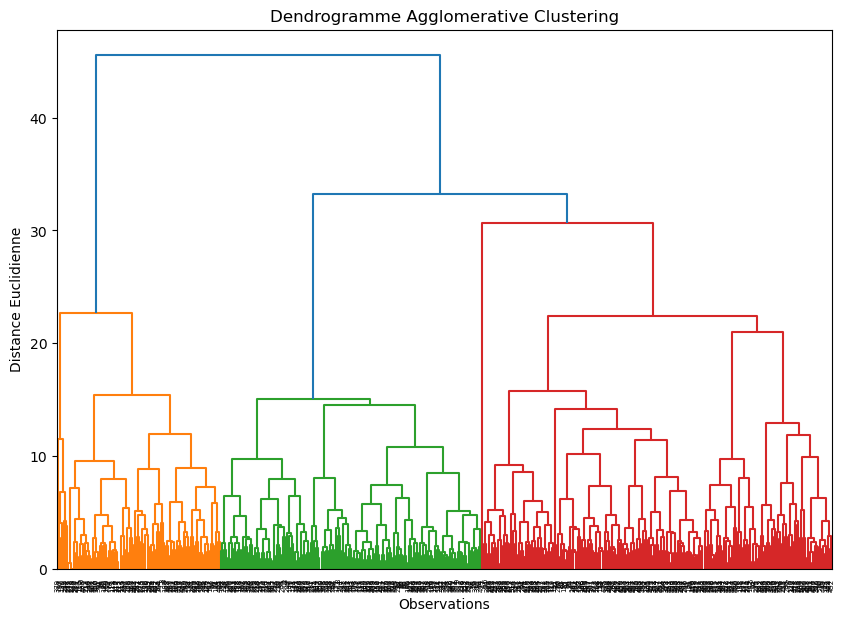

In [72]:
import scipy.cluster.hierarchy as sch

# Calcul des distances et création du dendrogramme
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogramme Agglomerative Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance Euclidienne')
plt.show()

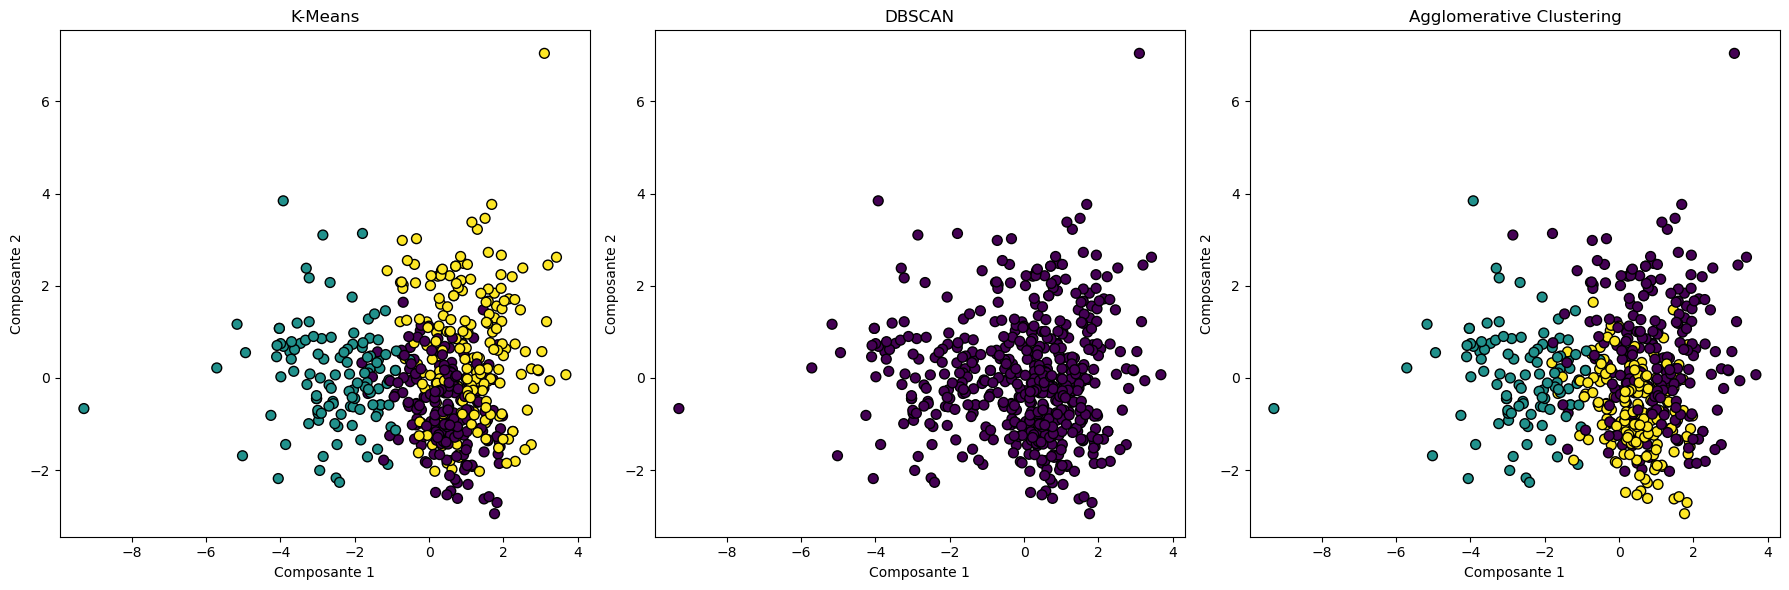

In [73]:
# Visualisation des clusters pour chaque méthode
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# K-Means
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
ax[0].set_title('K-Means')
ax[0].set_xlabel('Composante 1')
ax[0].set_ylabel('Composante 2')
# DBSCAN
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, cmap='viridis', edgecolor='k', s=50)
ax[1].set_title('DBSCAN')
ax[1].set_xlabel('Composante 1')
ax[1].set_ylabel('Composante 2')

# Agglomerative Clustering
ax[2].scatter(X_pca[:, 0], X_pca[:, 1], c=y_cha, cmap='viridis', edgecolor='k', s=50)
ax[2].set_title('Agglomerative Clustering')
ax[2].set_xlabel('Composante 1')
ax[2].set_ylabel('Composante 2')

plt.tight_layout()
plt.show()